### 1. Import Dependencies and Data

In [1]:
##!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [3]:
ds = tfds.load('fashion_mnist', split= 'train')

In [4]:
ds.as_numpy_iterator().next()['label']

2

### 2. Visualization and Building dataset

In [5]:
import numpy as np

In [6]:
data_iterator = ds.as_numpy_iterator()

In [7]:
data_iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

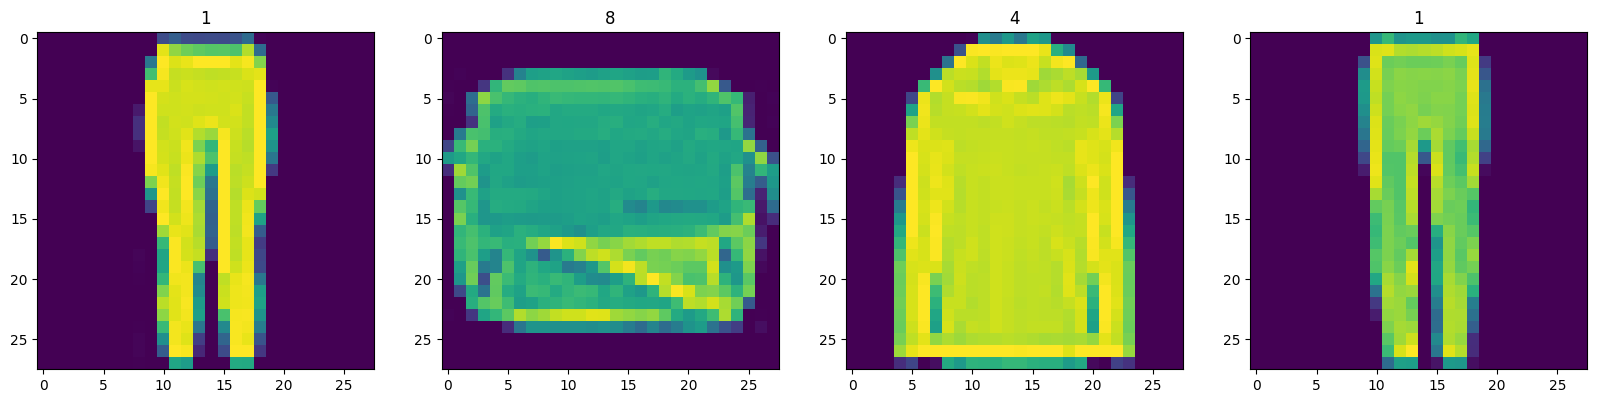

In [8]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx in range(4):
    sample = data_iterator.next()
    ax[idx].imshow(np.squeeze(sample['image']))
    ax[idx].title.set_text(sample['label'])

In [9]:
# Scale and return only images
def scale_image(data):
    image = data['image']
    return image / 255

In [10]:
##Steps to build a pipeline
## Scaling the dataset
ds = tfds.load('fashion_mnist', split = 'train')
## map
ds = ds.map(scale_image)
## cache for that batch
ds = ds.cache()
## shuffle the data up
ds = ds.shuffle(60000)
## batch size for the data
ds = ds.batch(128)
## prefetch will reduce the bottleneck
ds = ds.prefetch(64)

In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

### 3. Build the Neural Network

#### 3.1. Import Modelling Components

#### 3.2. Build Generator

In [12]:
## Import Sequential API for generator and discriminator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [13]:
def build_generator():
    model = Sequential()
    model.add(Dense(7*7*128, input_dim = 128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    #upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Convolution block 1
    model.add(Conv2D(128,4, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Convolution block 2
    model.add(Conv2D(128,4, padding = 'same'))
    model.add(LeakyReLU(0.2))
    
    #Conv layer to get to one channel
    model.add(Conv2D(1,4,padding = 'same', activation = 'sigmoid'))
    
    return model

In [14]:
generator = build_generator()
generator.summary()

C:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6272)                │         809,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 14, 14, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 128)         │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
img = generator.predict(np.random.randn(4,128,1))
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[[[0.49949107],
         [0.50103825],
         [0.49835575],
         ...,
         [0.50346196],
         [0.5008721 ],
         [0.5020635 ]],

        [[0.50799865],
         [0.51491743],
         [0.5224091 ],
         ...,
         [0.50649136],
         [0.5018668 ],
         [0.49977255]],

        [[0.50599915],
         [0.51286715],
         [0.5182648 ],
         ...,
         [0.5043227 ],
         [0.504108  ],
         [0.5002048 ]],

        ...,

        [[0.5035027 ],
         [0.50797606],
         [0.5026971 ],
         ...,
         [0.5031705 ],
         [0.49989137],
         [0.5015187 ]],

        [[0.5016672 ],
         [0.501474  ],
         [0.5047994 ],
         ...,
         [0.49940374],
         [0.5010355 ],
         [0.5025238 ]],

        [[0.4986457 ],
         [0.49802104],
         [0.49922612],
         ...,
         [0.49686217],
         [0.49739364],
         [0.49985662]]],


       [[[0.50455534],
         [0.500209  ],
         [0.49

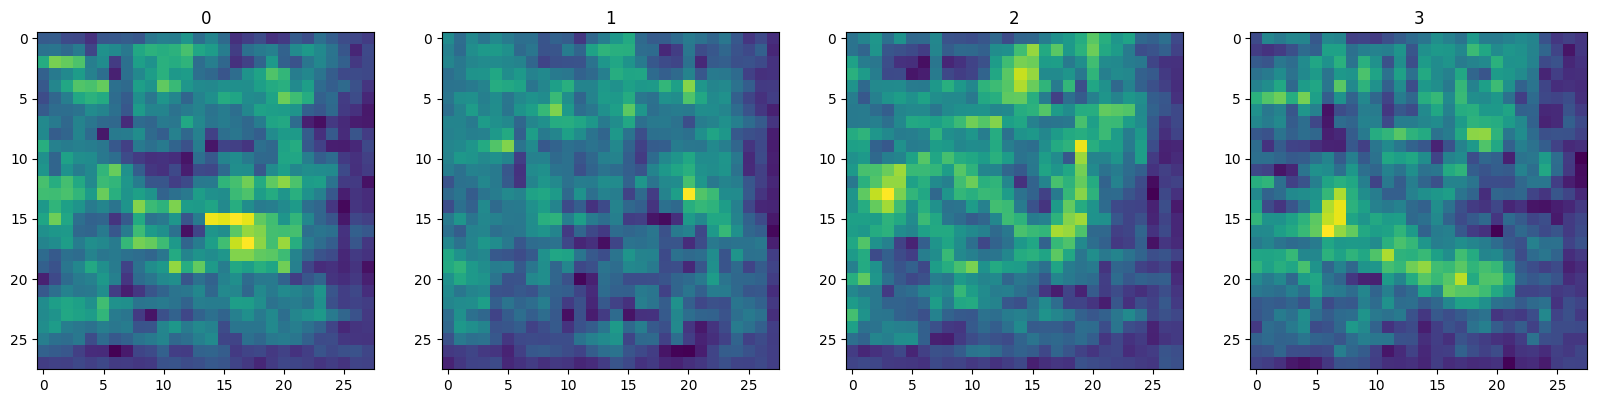

In [16]:
#Generate new fashion
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(img):
    sample = data_iterator.next()
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

#### 3.3. Build Discriminator

In [17]:
def build_discriminator():
    model = Sequential()
    
    #First Convolution block
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Second Convolution block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Third Convolution block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Fourth Convolution block
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    #Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model

In [18]:
discriminator = build_discriminator()

C:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 20, 20, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          36,865 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
img.shape

(4, 28, 28, 1)

In [24]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[0.49650013],
       [0.49649647],
       [0.49628484],
       [0.49621898]], dtype=float32)

### 4. Construct Training Loop

#### 4.1. Setup Losses and Optimizers

In [25]:
## Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
## Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [26]:
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

#### 4.2. Build Subclassed Model

In [27]:
## Importing the base model to class to subclass our training step
from tensorflow.keras.models import Model

In [28]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        ## Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)
        
        ## Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        ## Compile with the base class
        super().compile(*args, **kwargs)
        
        ## Create arttibutes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        
    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training = False)
        
        ## Train the discriminator
        with tf.GradientTape() as d_tape : 
            ## Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training = True)
            yhat_fake = self.discriminator(fake_images, training = True)
            yhat_realfake = tf.concat([yhat_real,yhat_fake], axis = 0)
            
            ## Create labels for real and fake images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis = 0)
            
            ## Add some noise to the outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis = 0)
            
            ## Calculate loss
            total_d_loss = self.d_loss(y_realfake,yhat_realfake)
            
        ## Apply backpropogation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        
        ## Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training = True)
            
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training = False)
            
            # Calculate loss to train and fake the discriminator results using generated images
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
        
        # Apply back propogation
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

In [29]:
## Create an instance of the class
fashgan = FashionGAN(generator, discriminator)

In [30]:
## Compile the model
fashgan.compile(g_opt,d_opt, g_loss, d_loss)

#### 4.3. Build Callback

In [31]:
import os 
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [35]:
class ModelMonitor(Callback):
    def __init__(self, num_img = 3, latent_dim = 128):
        self.num_img = num_img
        self.latent_dim = latent_dim
    
    def on_epoch_end(self, epoch, logs = None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

#### 4.3. Train

In [36]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [37]:
## Recommended 2000
hist = fashgan.fit(ds, epochs = 20, callbacks = [ModelMonitor()])

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3013s 6s/step - d_loss: 0.3191 - g_loss: 2.4903 - loss: 0.0000e+00
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2985s 6s/step - d_loss: 0.3317 - g_loss: 6.4967 - loss: 0.0000e+00
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3019s 6s/step - d_loss: 0.3070 - g_loss: 6.7458 - loss: 0.0000e+00
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3032s 6s/step - d_loss: 0.6597 - g_loss: 0.6525 - loss: 0.0000e+00
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 23073s 49s/step - d_loss: 0.4861 - g_loss: 0.2630 - loss: 0.0000e+00
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2851s 6s/step - d_loss: 0.3222 - g_loss: 0.0276 - loss: 0.0000e+00
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3119s 7s/step - d_loss: 0.3039 - g_loss: 0.0486 - loss: 0.0000e+00
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2752s 6s/step - d_loss: 0.4010 - g_loss: 0.1459 - loss: 0.0000e+00
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2753s 6s/step - d_loss: 0.2878 - g_loss: 0.0588 - loss: 0.0000e+00
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━

### 5. Test Generator

In [69]:
imgs = generator.predict(tf.random.normal((16,128,1)))
imgs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


array([[[[2.75136681e-05],
         [5.82779547e-10],
         [3.94570769e-13],
         ...,
         [1.55446116e-07],
         [5.60774315e-05],
         [7.65589675e-07]],

        [[3.48309427e-02],
         [6.97126598e-06],
         [7.30491578e-09],
         ...,
         [9.97852823e-08],
         [3.22913074e-05],
         [1.55253957e-07]],

        [[1.25254085e-02],
         [1.01309861e-05],
         [4.77429118e-08],
         ...,
         [1.17882939e-08],
         [9.33464980e-06],
         [1.28226475e-07]],

        ...,

        [[5.61229115e-07],
         [3.58981160e-05],
         [3.86335258e-03],
         ...,
         [7.39877596e-02],
         [2.82915253e-02],
         [1.17408819e-02]],

        [[3.49851325e-05],
         [2.21023452e-04],
         [7.06436066e-03],
         ...,
         [3.93753685e-02],
         [4.36857119e-02],
         [5.12900874e-02]],

        [[1.98722375e-03],
         [2.22781510e-03],
         [1.19862976e-02],
         ...,
 

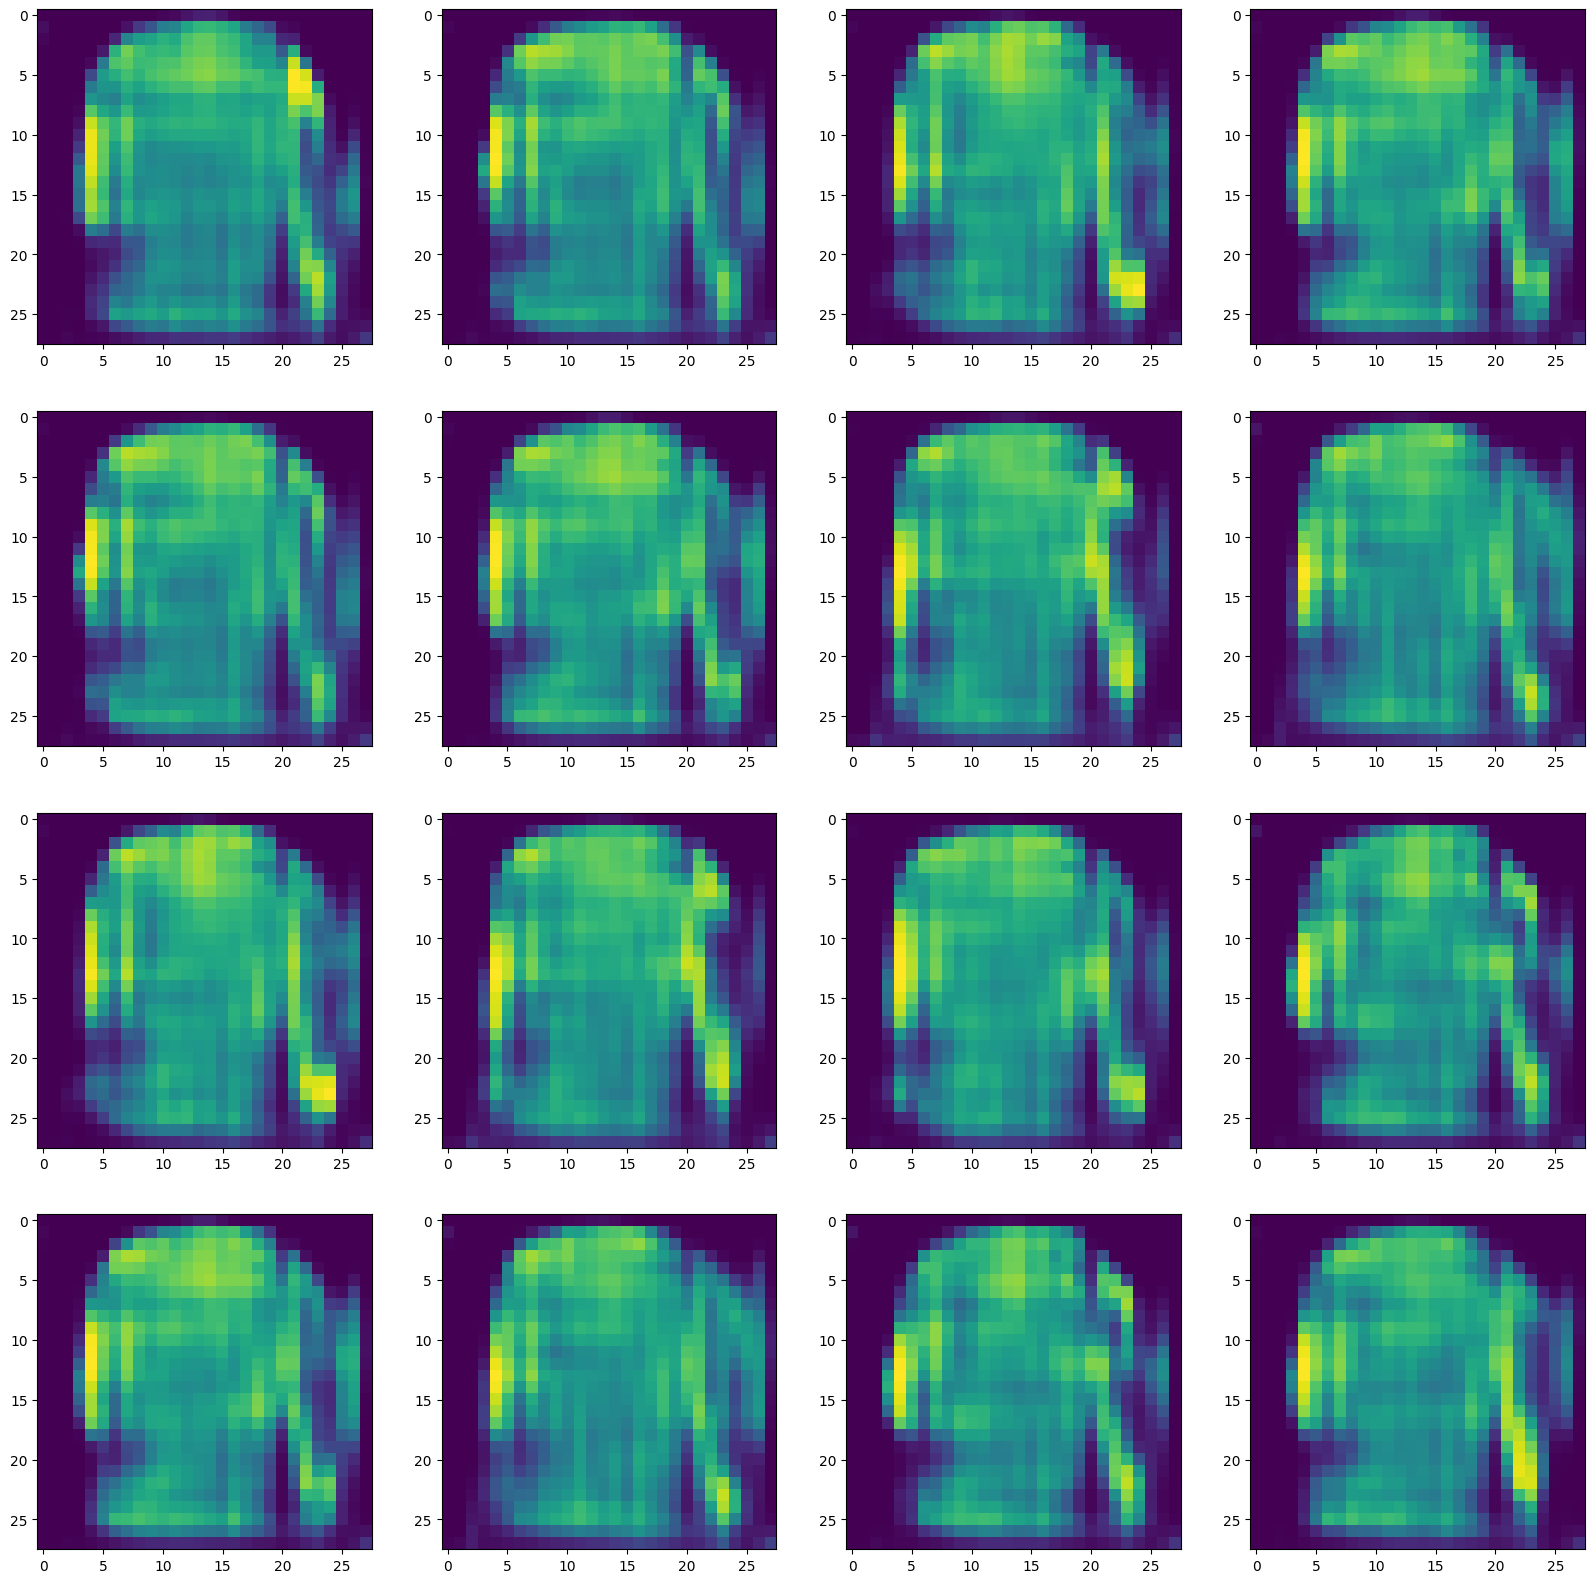

In [70]:
fig , ax = plt.subplots(ncols = 4, nrows = 4, figsize = (20, 20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

In [71]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')